<a href="https://colab.research.google.com/github/yonehai/ML-labs/blob/main/lab8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

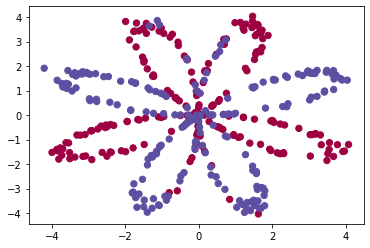

In [15]:
def get_dataset():
  np.random.seed(1)
  m = 400
  N = int(m / 2) # number of points per class
  
  dimension = 2
  X = np.zeros((m, dimension)) # data matrix where each row is a single example
  Y = np.zeros((m, 1), dtype='uint8') # labels vector (0 for red, 1 for blue)
  flower_ray = 4

  for j in range(2):
      indexs = range(N*j, N*(j+1))
      t = np.linspace(j*3.12, (j+1)*3.12, N) + np.random.randn(N)*0.2
      r = flower_ray * np.sin(4*t) + np.random.randn(N) * 0.2
      X[indexs] = np.c_[r*np.sin(t), r*np.cos(t)]
      Y[indexs] = j
      
  X = X.T
  Y = Y.T
  return X, Y

X, Y = get_dataset()
plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);


In [16]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

def sigmoid_derivative(X):
    return sigmoid(X)/(1-sigmoid(X))

In [17]:
def compute_cost(A2, Y):

    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1-Y)
    cost = -np.sum(logprobs) / m
    cost = np.squeeze(cost) 
    return cost

In [18]:
class NeuralNetwork():

    def __init__(self, input_layer, hidden_layer, output_layer, learning_rate):
        self.input_layer = input_layer # кількість вхідних шарів
        self.hidden_layer = hidden_layer # кількість прихованих шарів
        self.output_layer = output_layer # кількість вихідних шарів
        self.learning_rate = learning_rate # швидкість навчання
        self.W1 = None # ваги
        self.W2 = None
        self.b1 = None # біас
        self.b2 = None
        self.initialize_parameters()

    def initialize_parameters(self):
        self.W1 = np.random.randn(self.hidden_layer, self.input_layer) * 0.01
        self.b1 = np.zeros((self.hidden_layer, 1))
        self.W2 = np.random.randn(self.output_layer, self.hidden_layer) * 0.01
        self.b2 = np.zeros((self.output_layer, 1))

################################### GOOD
    def forward_propagation(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = sigmoid(Z2)

        return {
                'Z1': Z1,
                'A1': A1,
                'Z2': Z2,
                'A2': A2
            }

################################### GOOD
    def backward_propagation(self, X, Y, cache): 
        A2 = cache['A2']
        A1 = cache['A1']
        Z1 = cache['Z1']
        Z2 = cache['Z2']
    
        m = Y.shape[1]

        dZ2 = A2 - Y
        dW2 = 1/m * np.dot(dZ2, A1.T)
        db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
        # dZ1 = np.dot(self.W2.T, dZ2) * sigmoid_derivative(Z1) ########## PROBLEM
        dZ1 = np.dot(self.W2.T, dZ2) * (1 - np.power(A1, 2))
        dW1 = 1/m * np.dot(dZ1, X.T)
        db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)

        return {
                'dW1': dW1,
                'db1': db1,
                'dW2': dW2,
                'db2': db2
            }

################################### GOOD
    def update_parameters(self, grads):
        self.W1 -= self.learning_rate * grads['dW1']
        self.b1 -= self.learning_rate * grads['db1']
        self.W2 -= self.learning_rate * grads['dW2']
        self.b2 -= self.learning_rate * grads['db2']

In [19]:

class NNClassifier:
    def __init__(self, model, epochs=1000):
        self.model = model
        self.epochs = epochs
        self.cost = []
    
    def fit(self, X, Y):
        self.model.initialize_parameters()
    
        for i in range(self.epochs):
            output = self.model.forward_propagation(X)
            self.cost.append(compute_cost(output["A2"], Y))
            grads = self.model.backward_propagation(X, Y, output)
            self.model.update_parameters(grads)
            
            if i % 1000 == 0: 
                print("Iteration {} --- Cost function {:.3f}".format(i, self.cost[i]))

    def predict(self, X):
        predict = self.model.forward_propagation(X)
        predict = predict["A2"] > 0.5
        return predict

In [20]:
NN = NeuralNetwork(2, 4, 1, 1.2)
classifier = NNClassifier(NN, 10000)

In [21]:
classifier.fit(X, Y)

Iteration 0 --- Cost function 0.693
Iteration 1000 --- Cost function 0.281
Iteration 2000 --- Cost function 0.269
Iteration 3000 --- Cost function 0.262
Iteration 4000 --- Cost function 0.257
Iteration 5000 --- Cost function 0.254
Iteration 6000 --- Cost function 0.252
Iteration 7000 --- Cost function 0.250
Iteration 8000 --- Cost function 0.249
Iteration 9000 --- Cost function 0.248


In [22]:
prediction = classifier.predict(X)

In [23]:
accuracy = float((np.dot(Y,prediction.T) + np.dot(1-Y,1-prediction.T))/float(Y.size)*100)
print(f'Accuracy: {accuracy}%')

Accuracy: 91.25%


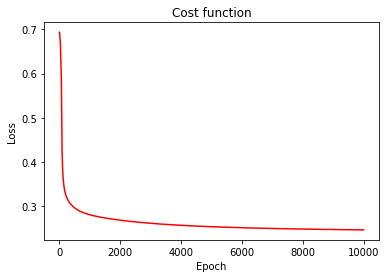

In [24]:
plt.plot(range(0, classifier.epochs), classifier.cost, 'r')
plt.title("Cost function")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

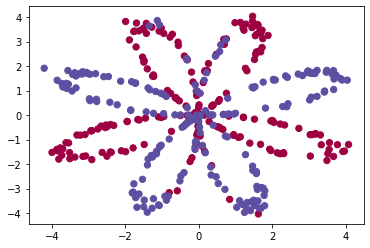

In [25]:
 plt.scatter(X[0, :], X[1, :], c=Y[0], s=40, cmap=plt.cm.Spectral);

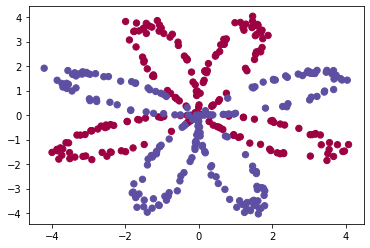

In [26]:
plt.scatter(X[0, :], X[1, :], c=prediction, s=40, cmap=plt.cm.Spectral)